## Creating a Python script to remove the background from an uploaded image, specifically focusing on accurately isolating a person.

### Installing Required Libraries

In [1]:
!pip install opencv-python Pillow

### Explanation of the Code:

1. **Read Image:**
   - The code reads an image from the specified path using the Pillow library and converts it to a NumPy array.

2. **Create Mask:**
   - A mask is initialized as an array of zeros with the same shape as the image. Pixels in the mask are initially set to 'unknown' (value 2).

3. **Define Rectangle:**
   - A rectangle is defined around the object in the image. This rectangle is used as an initial estimate for the foreground during GrabCut.

4. **Initialize Models:**
   - Background (bgd_model) and foreground (fgd_model) models are initialized as arrays for the GrabCut algorithm.

5. **Apply GrabCut:**
   - The GrabCut algorithm is applied to the image using the provided rectangle and models. It refines the segmentation based on color and spatial information.

6. **Modify Mask:**
   - The mask is modified to separate the foreground (3) and probable foreground (1) from the rest of the image.

7. **Apply Mask to Original Image:**
   - The modified mask is applied to the original image, preserving only the foreground and probable foreground regions.

8. **Display Images:**
   - The original image and the result are displayed using `cv2_imshow` from the Google Colab patches.

9. **Main Execution:**
   - The main block of code ensures that the `remove_background` function is called when the script is run. It specifies the path to the image file.

## **_GrabCut Algorithm_**

GrabCut is an interactive segmentation algorithm used for foreground extraction in images. It was introduced by Carsten Rother, Vladimir Kolmogorov, and Andrew Blake in 2004.

1. **Initialization:**
   - The user provides an initial rectangular bounding box around the object of interest in the image. This bounding box serves as the initial estimate of the foreground.

2. **Graph Cut Optimization:**
   - The algorithm models the image as a graph, where each pixel is a node, and edges between nodes represent pairwise relationships.
   - A graph cut algorithm is then applied to partition the graph into two sets of nodes: the foreground and the background.

3. **Iterative Refinement:**
   - The initial segmentation is refined through an iterative process.
   - The algorithm alternates between updating the color models of the foreground and background and recomputing the segmentation based on the new models.

4. **Color Models:**
   - GrabCut models the color distribution of pixels using Gaussian Mixture Models (GMMs) for both the foreground and the background.
   - Each pixel is assigned a probability of belonging to the foreground or background based on its color.

5. **User Interaction:**
   - The user has the option to provide additional scribbles on the image to guide the algorithm. Scribbles can mark areas as definitely foreground, definitely background, or uncertain.
   - These user-provided constraints help refine the segmentation.

6. **Convergence:**
   - The algorithm continues iterating until it converges to a stable segmentation.
   - The convergence criteria often involve checking whether the segmentation mask remains unchanged or changes only marginally between iterations.

GrabCut efficiently combines user-provided information with statistical models of color to produce accurate foreground extractions. While effective, it may require parameter tuning and might not be suitable for all types of images, especially those with complex backgrounds or when the object of interest has similar colors to the background.


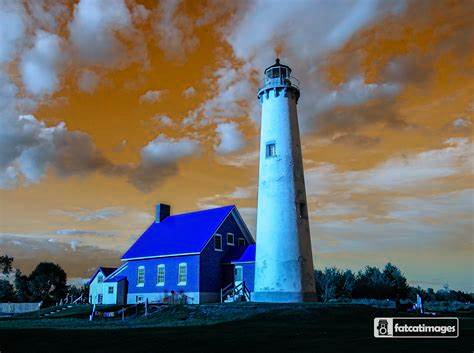

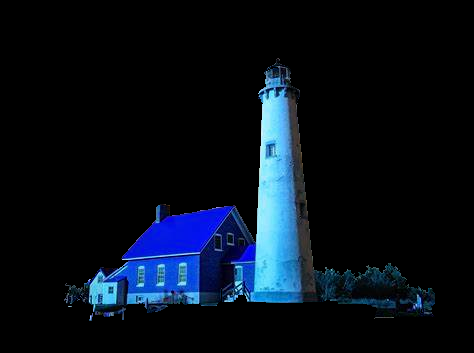

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

def remove_background(image_path):
    # Step 1: Read the image using PIL (Pillow)
    img = np.array(Image.open(image_path))

    # Step 2: Create a mask and initialize it as 'unknown' (2)
    mask = np.zeros(img.shape[:2], np.uint8)
    mask[:, :] = 2

    # Step 3: Define a rectangle around the object to help GrabCut segment the image
    rect = (50, 50, img.shape[1]-80, img.shape[0]-80)

    # Step 4: Initialize the foreground and background models
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Step 5: Apply GrabCut algorithm
    cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Step 6: Modify the mask to separate foreground (3) and probable foreground (1)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Step 7: Apply the mask to the original image
    result = img * mask2[:, :, np.newaxis]

    # Step 8: Display the original image and the result
    cv2_imshow(img)
    cv2_imshow(result)

if __name__ == "__main__":

    # Step 9: Replace image_path is the image path
    # First checking with lighthouse image
    image_path = '/content/Light House Sample Image.jpg'
    remove_background(image_path)

## Testing on other Images

### Sunflower Image

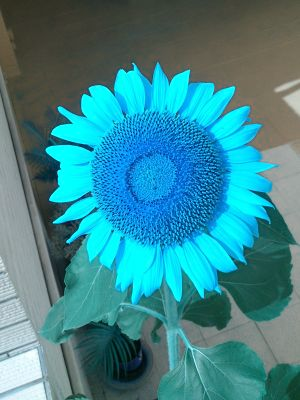

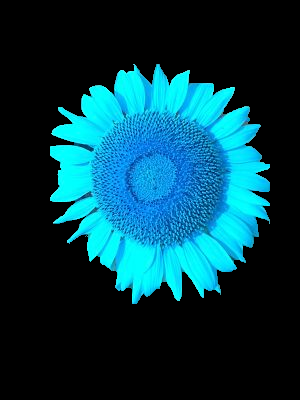

In [10]:
remove_background("/content/Sunflower Image.jpg")

### Boxes/ Object Detection

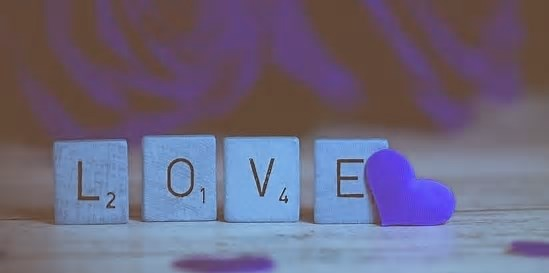

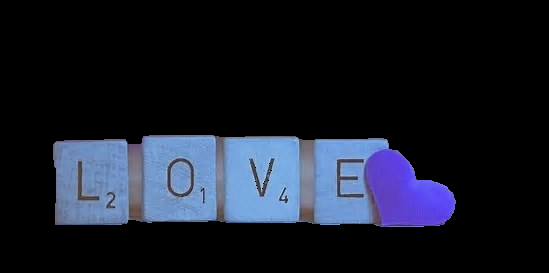

In [11]:
remove_background("/content/Boxes With Background Image.jpg")

## Now we will check for person/ face detection


### Testing on photo of person with background

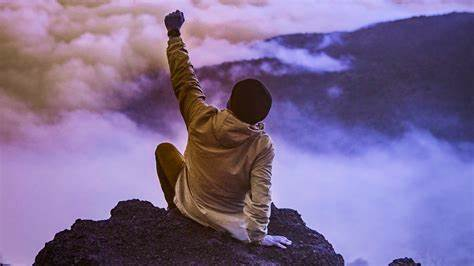

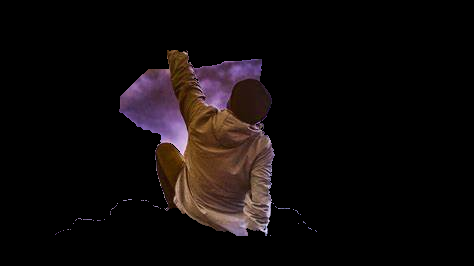

In [12]:
remove_background("/content/Person With Background 1.jpg")

### Testing on photo of person with background(Selfie Of Person)

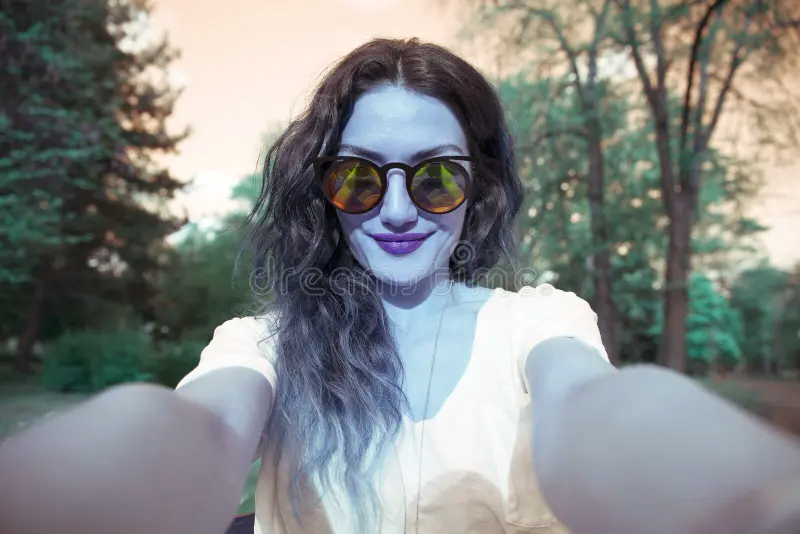

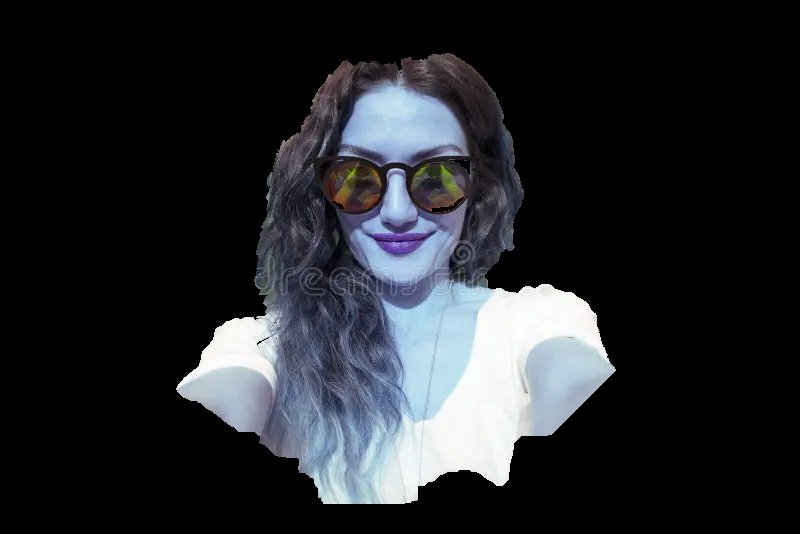

In [13]:
remove_background("/content/Person With Background 2.jpg")

### Testing on Group of person to see how well it perform

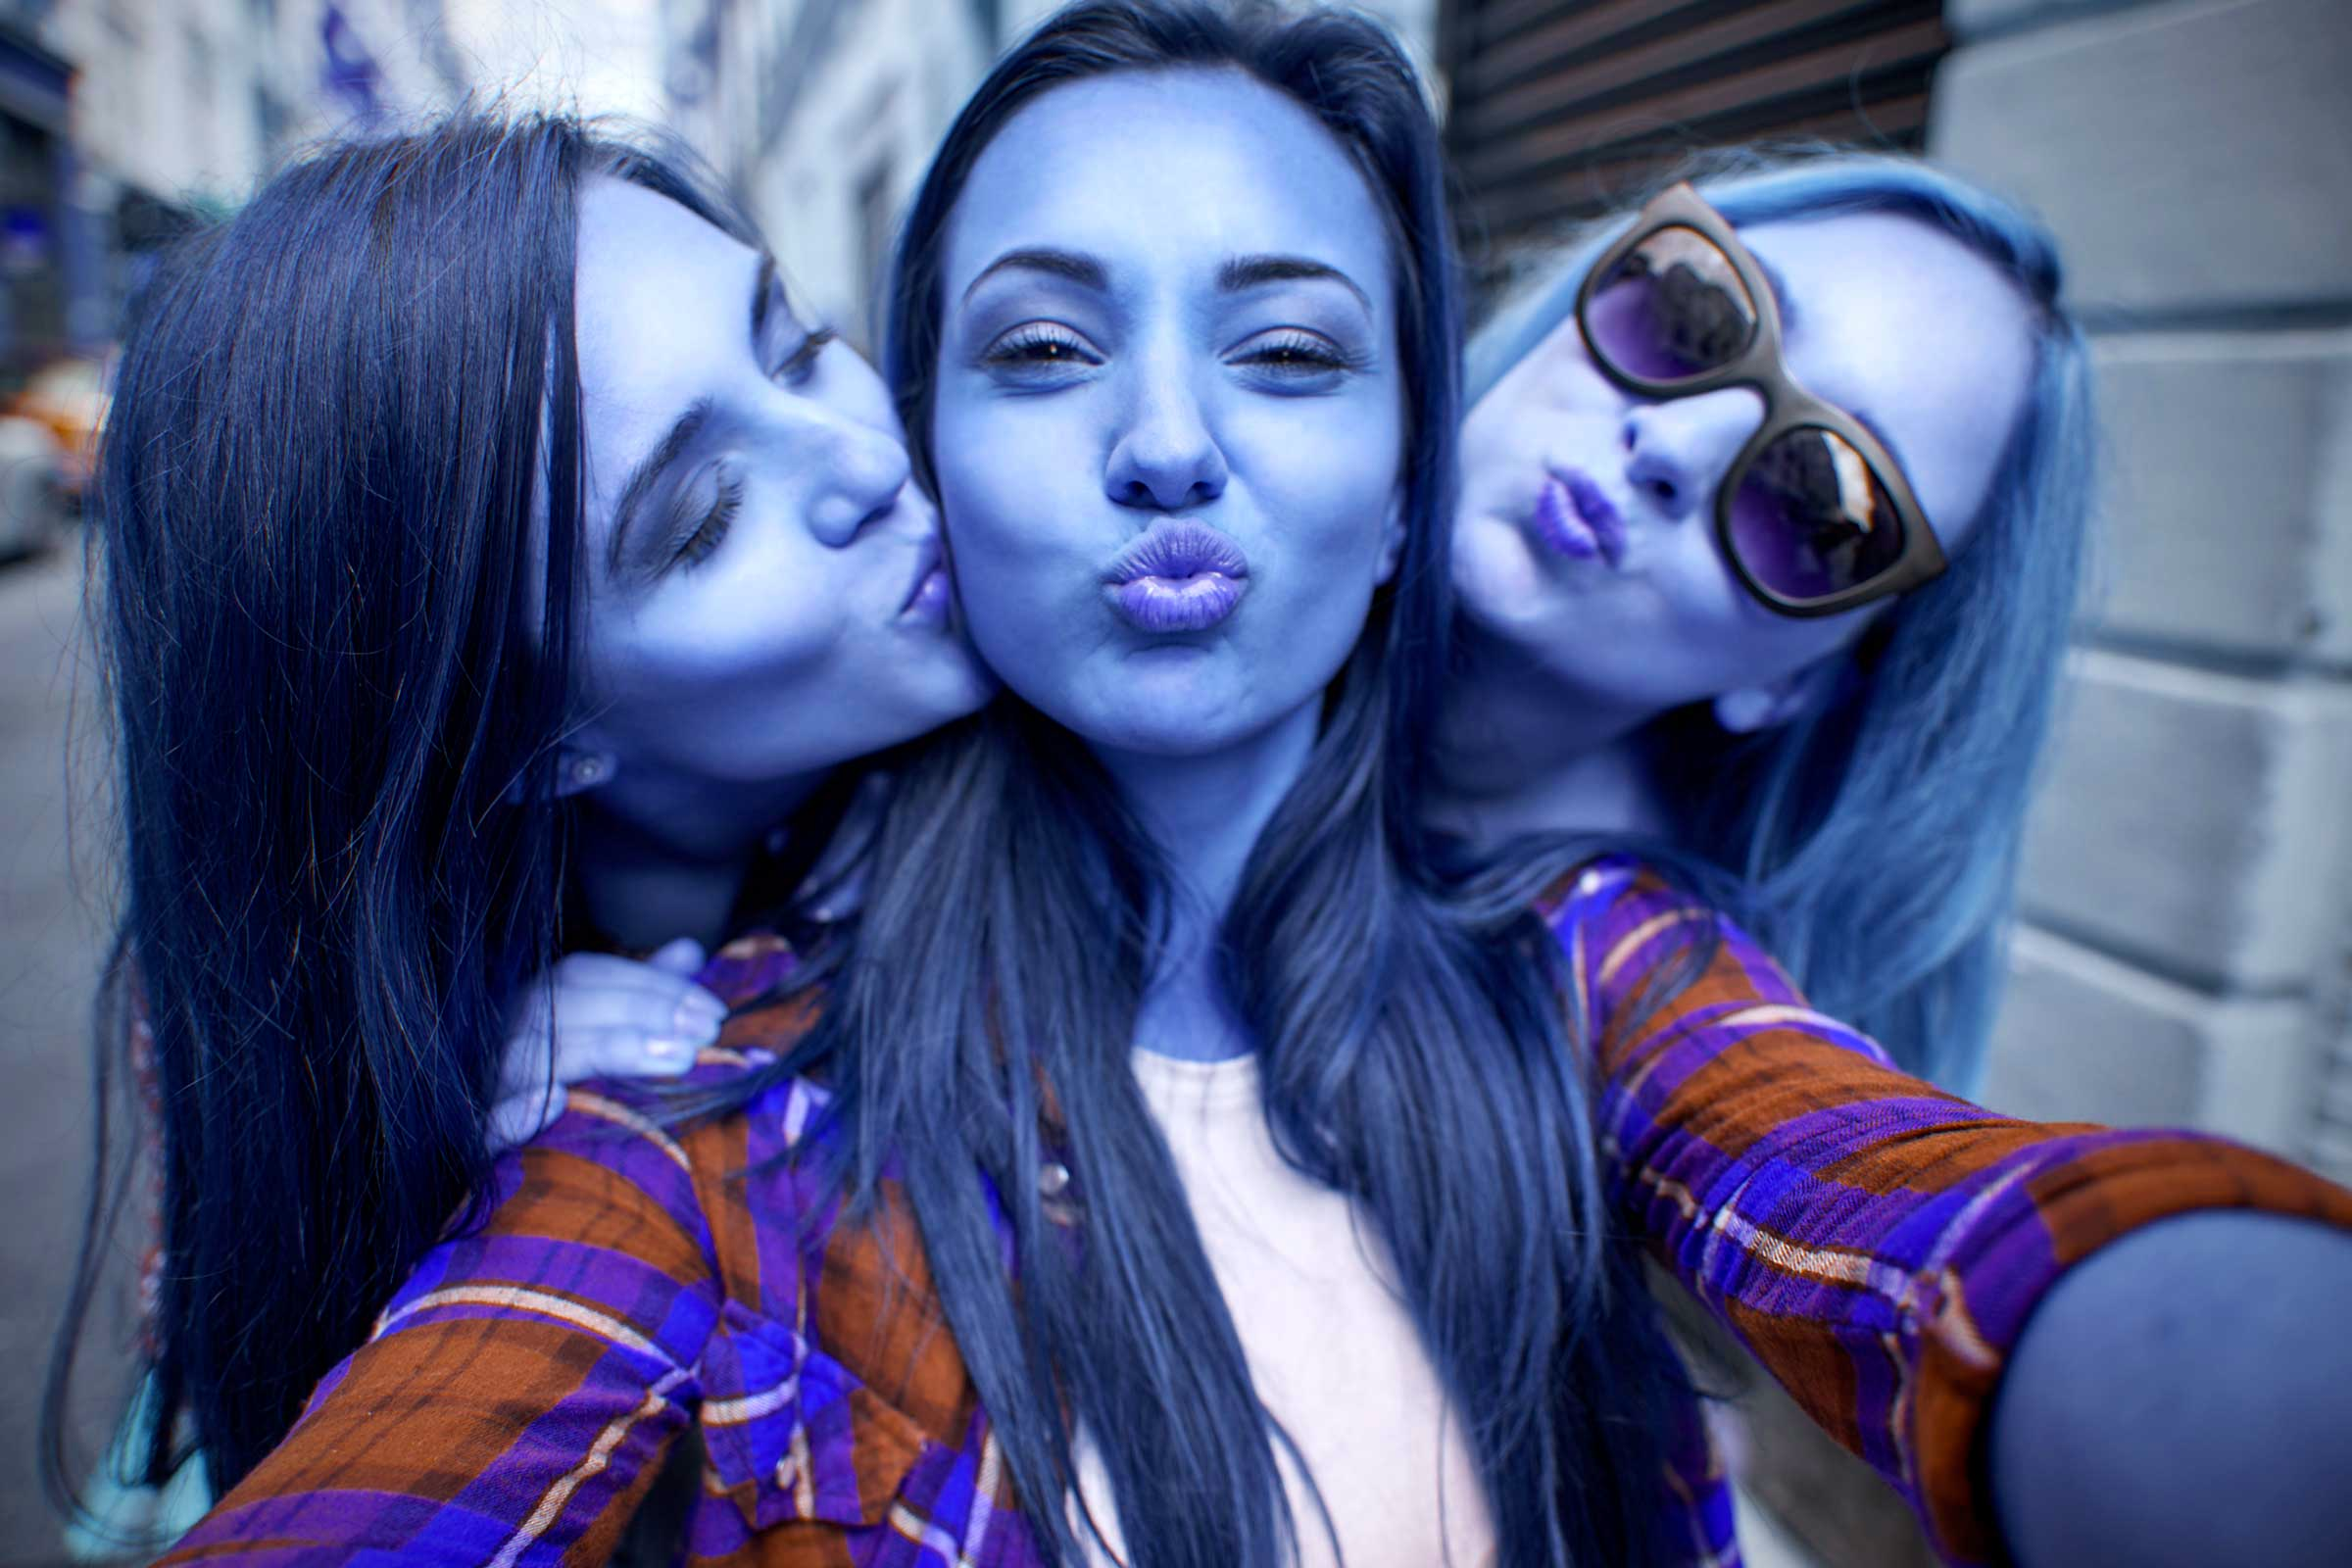

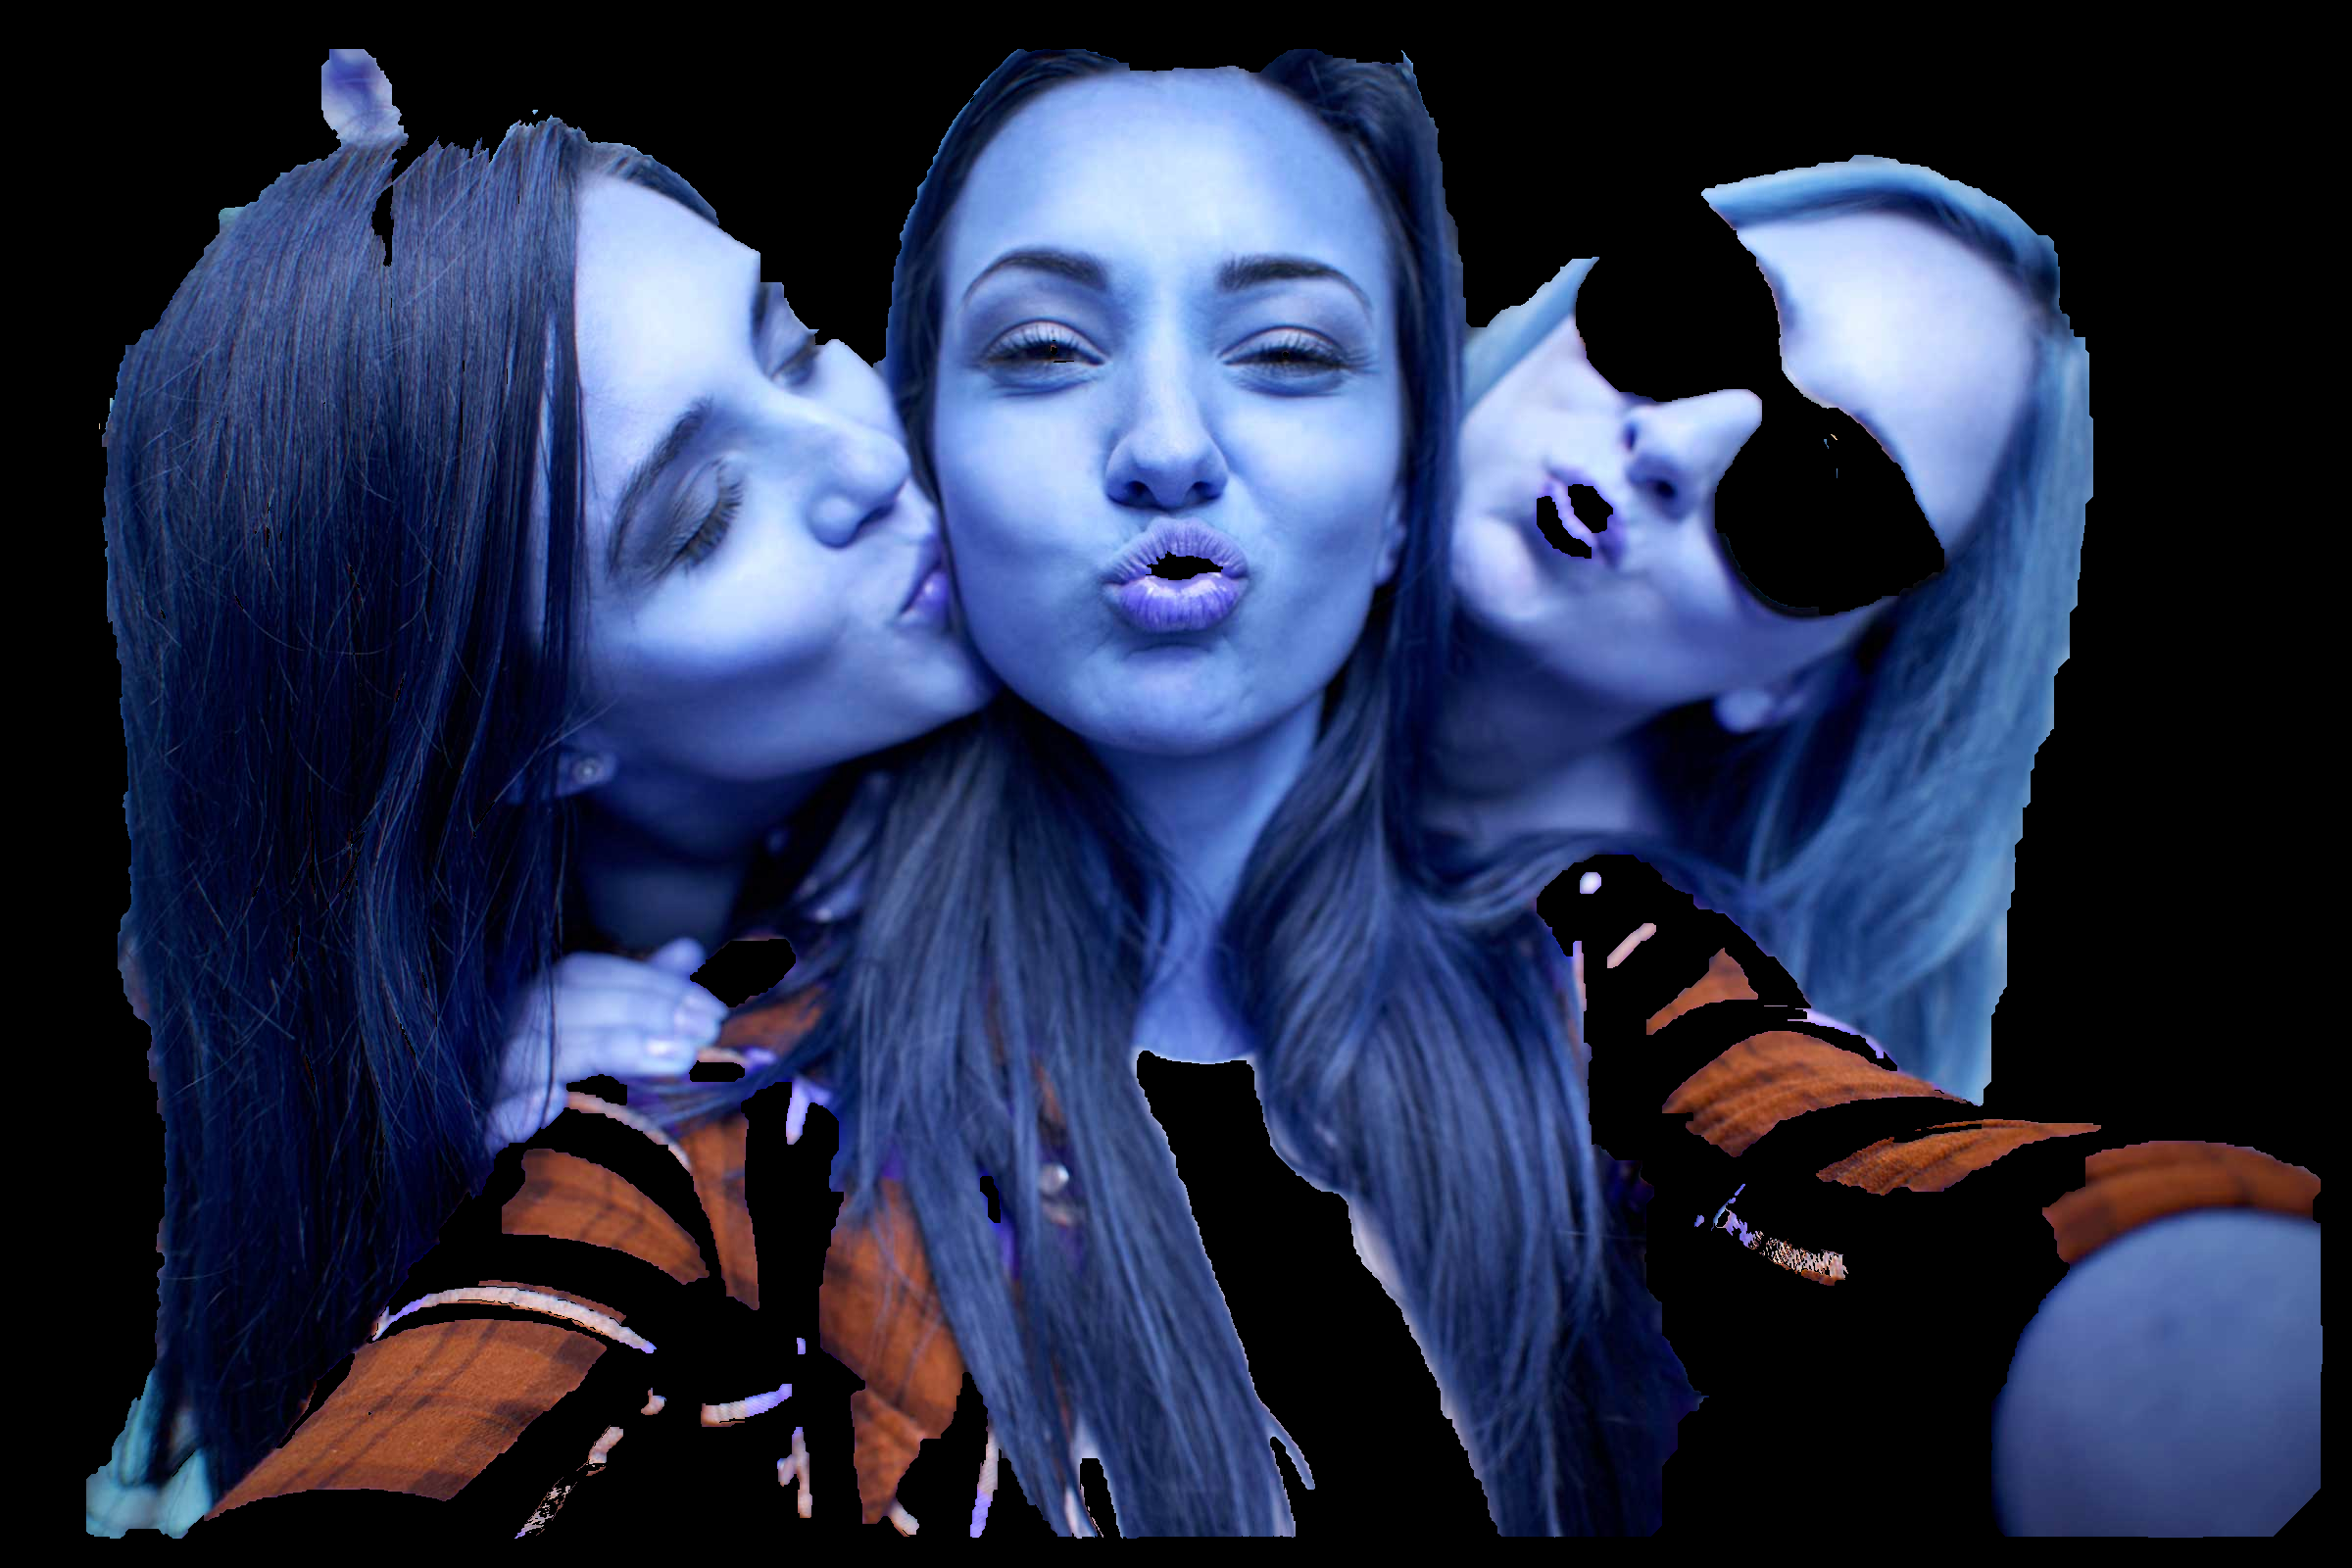

In [14]:
remove_background("/content/Group of People With Background.jpg")